Use Python’s Yfinance Package to import the last ten
(10) years of daily price data (the Open and the Close
Prices for each day) for at least five (5) stocks of your
choice. BE SURE THE STOCKS YOU CHOOSE HAVE
THIS DATA AVAILABLE FOR ALL OF THE NORMAL
TRADING DAYS IN THE LAST TEN (10) YEARS!

In [1]:
import numpy as np   
import yfinance as yf
import pandas as pd
from pandas_datareader import data as pdr
yf.pdr_override()

In [3]:
df1 = pdr.get_data_yahoo('AMZN','2011-01-03','2021-10-31')
df1 = df1[['Open','Close']] 
df1 =df1.rename(columns ={'Open':'Open_AMZN','Close':'Close_AMZN'})
df2 = pdr.get_data_yahoo('MSFT','2011-01-03','2021-10-31')
df2 = df2[['Open','Close']]
df2 =df2.rename(columns ={'Open':'Open_MSFT','Close':'Close_MSFT'})
df3 = pdr.get_data_yahoo('AAPL','2011-01-03','2021-10-31')
df3 = df3[['Open','Close']] 
df3 =df3.rename(columns ={'Open':'Open_AAPL','Close':'Close_AAPL'})
df4 = pdr.get_data_yahoo('GOOGL','2011-01-03','2021-10-31')
df4 = df4[['Open','Close']] 
df4 =df4.rename(columns ={'Open':'Open_GOOGL','Close':'Close_GOOGL'})
df5 = pdr.get_data_yahoo('FORD','2011-01-03','2021-10-31')
df5 = df5[['Open','Close']] 
df5 =df5.rename(columns ={'Open':'Open_FORD','Close':'Close_FORD'})

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Join the individual tables containing the price data for the individual stocks into a single data table indexed by date.

In [4]:
df =df1.merge(df2, on = 'Date')
df =df.merge(df3, on = 'Date')
df =df.merge(df4, on = 'Date')
df =df.merge(df5, on = 'Date')
df.head()


,Open_AMZN,Close_AMZN,Open_MSFT,Close_MSFT,Open_AAPL,Close_AAPL,Open_GOOGL,Close_GOOGL,Open_FORD,Close_FORD
Date,,,,,,,,,,
2011-01-03,181.369995,184.220001,28.049999,27.98,11.630000,11.770357,298.538544,302.477478,3.13,3.08
2011-01-04,186.149994,185.009995,27.940001,28.09,11.872857,11.831786,303.113098,301.361359,3.06,3.10
2011-01-05,184.100006,187.419998,27.900000,28.00,11.769643,11.928571,300.335327,304.839844,3.13,3.32
2011-01-06,186.500000,185.860001,28.040001,28.82,11.954286,11.918929,305.645660,307.057068,3.20,3.20
2011-01-07,187.880005,185.490005,28.639999,28.60,11.928214,12.004286,308.263275,308.528534,3.17,3.11


Slice off the first three (3) years of daily price data.
Retain the Close Prices and convert them into daily return values. Drop any NaN’s as needed. YOU MAY NEED TO CONVERT THIS DATAFRAME INTO A MATRIX AND THEN TRANSPOSE IT IN ORDER TO RUN ALL OF YOUR CODE. BE SURE TO KEEP THE OTHER SEVEN (7) YEARS OF DAILY PRICE DATA AROUND FOR LATER USE!

In [5]:
three_years =  df.loc['2011-01-01':'2013-12-31'] 
three_years = three_years[['Close_AMZN','Close_MSFT','Close_AAPL', 'Close_GOOGL','Close_FORD']]                                     
three_years ['Return_AMZN'] = three_years['Close_AMZN'].pct_change() 
three_years ['Return_MSFT'] = three_years['Close_MSFT'].pct_change() 
three_years ['Return_AAPL'] = three_years['Close_AAPL'].pct_change()
three_years ['Return_GOOGL'] = three_years['Close_GOOGL'].pct_change() 
three_years ['Return_FORD'] = three_years['Close_FORD'].pct_change() 
three_years = three_years[['Return_AMZN','Return_MSFT','Return_AAPL','Return_GOOGL','Return_FORD']]
three_years = three_years.dropna()
three_years



,Return_AMZN,Return_MSFT,Return_AAPL,Return_GOOGL,Return_FORD
Date,,,,,
2011-01-04,0.004288,0.003931,0.005219,-0.003690,0.006494
2011-01-05,0.013026,-0.003204,0.008180,0.011543,0.070968
2011-01-06,-0.008324,0.029286,-0.000808,0.007273,-0.036145
2011-01-07,-0.001991,-0.007634,0.007161,0.004792,-0.028125
2011-01-10,-0.004367,-0.013287,0.018833,-0.003618,0.022508
...,...,...,...,...,...
2013-12-24,-0.009233,0.012562,-0.004245,-0.002923,0.000000
2013-12-26,0.013001,0.009709,-0.006641,0.005055,0.082192
2013-12-27,-0.015604,-0.004006,-0.006757,0.000841,-0.050633


In [6]:
matrix_of_return_values = np.asmatrix(three_years)
matrix_of_return_values = matrix_of_return_values.T

Generate at least ten thousand (10,000) different vectors of weights (percentages), each of whose sum is one (1) and each of whose length is equal to your number of stocks. This is the same as asking you to simulate at least ten thousand (10,000) different portfolio allocations as each of the ten thousand (10,000) different vectors corresponds to a unique portfolio allocation possibility.

In [7]:
no_of_asset_classes = 5
no_of_portfolios = 10000
collection_of_random_asset_weights = []
portfolio_means = []
portfolio_standard_deviations = []
portfolio_sharpe_ratios = []

Calculate the overall portfolio mean, the overall portfolio standard deviation, and the Sharpe ratio of each of the portfolio allocation possibilities obtained in the previous step. You may assume a risk-free return rate of zero percent (0%). BE SURE TO CAREFULLY KEEP TRACK OF AND REMEMBER ALL OF THE DIFFERENT VALUES THAT YOU ARE CALCULATING!

In [8]:
def get_random_asset_weights(no_of_asset_classes):
    random_asset_weights = np.random.rand(no_of_asset_classes)
    random_asset_weights /= sum(random_asset_weights)  
    random_asset_weights = np.asmatrix(random_asset_weights)  
    return random_asset_weights    


def get_portfolio_statistics(asset_weights, matrix_of_return_values): 
    asset_means = np.asmatrix(np.mean(matrix_of_return_values, axis = 1))
    asset_covariances = np.asmatrix(np.cov(matrix_of_return_values))
    portfolio_mean = asset_weights * asset_means
    portfolio_mean = portfolio_mean.item()
    portfolio_standard_deviation =np.sqrt(asset_weights * asset_covariances * asset_weights.T) 
    portfolio_standard_deviation = portfolio_standard_deviation.item()
    portfolio_sharpe_ratio = portfolio_mean /portfolio_standard_deviation 
    return portfolio_mean, portfolio_standard_deviation, portfolio_sharpe_ratio


while len(collection_of_random_asset_weights) < no_of_portfolios:
    random_asset_weights = get_random_asset_weights(no_of_asset_classes)
    collection_of_random_asset_weights.append(random_asset_weights) 
    A,B,C=get_portfolio_statistics(random_asset_weights,matrix_of_return_values)
    portfolio_means.append(A)
    portfolio_standard_deviations.append(B)
    portfolio_sharpe_ratios.append(C)


Determine which vector of asset weights (percentages) results in the portfolio allocation possibility of highest Sharpe ratio. Create a Pandas DataFrame with a single row containing these asset weights (percentages) in which the columns are labeled with the asset names and the row has index equal to the last date represented in the dataset you used to perform the portfolio optimization.

In [9]:
index = portfolio_sharpe_ratios.index(max(portfolio_sharpe_ratios))
x = collection_of_random_asset_weights[index]
x

matrix([[3.66658118e-01, 6.56180636e-02, 2.10160866e-01, 3.57411451e-01,
         1.51501428e-04]])

In [10]:
weights =pd.DataFrame({'AMZN':[x[0,0]],'MSFT':[x[0,1]],'AAPL':[x[0,2]],'GOOGL':[x[0,3]],'FORD':[x[0,4]]},index=[three_years.last_valid_index()])
weights

,AMZN,MSFT,AAPL,GOOGL,FORD
2013-12-31,0.366658,0.065618,0.210161,0.357411,0.000152


1. Make a scatterplot showing the corresponding values (x, y) of the overall portfolio standard deviation and overall portfolio mean for each of your portfolio allocation possibilities.

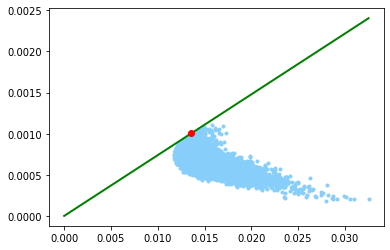

In [11]:
from matplotlib import pyplot as plt
x1 = np.linspace(0, max(portfolio_standard_deviations), 10000)
y = portfolio_sharpe_ratios[index] * x1
plt.plot(portfolio_standard_deviations, portfolio_means, 'o', markersize = 3, color = 'lightskyblue')
plt.plot(x1, y, '-', linewidth = 2, color = 'green')
plt.plot(portfolio_standard_deviations[index], portfolio_means[index], color= 'r', marker = 'o' )
plt.show()

2. Report the maximum value of Sharpe ratio achieved by any of your portfolio allocation possibilities. (This is the value of the Sharpe ratio corresponding to the vector of asset weights [percentages] you found while completing the task in the fifth bullet point above.)

In [12]:
print(index)
print(portfolio_sharpe_ratios[index])

2838
0.07390248896092629


3. Give a complete conceptual description of the meaning of the Sharpe ratio as it relates to the theory of portfolio optimization. Why do portfolio managers seek to maximize this measure?

Black Belt
#Closed-End Fund

In [13]:
capital = 10000
allocations = capital*weights
allocations

,AMZN,MSFT,AAPL,GOOGL,FORD
2013-12-31,3666.581179,656.180636,2101.608656,3574.114514,1.515014


In [14]:
Share_amounts= allocations / df[[f'Close_{sym}'for sym in weights.columns]].loc[weights.last_valid_index()].values
Share_amounts

,AMZN,MSFT,AAPL,GOOGL,FORD
2013-12-31,9.194265,17.540247,104.889385,6.371926,0.977429


In your notebook, display your portfolio-fund as a single instrument for grader to evaluate. It should only have the columns Open and Close; and for an index it should have the all the dates after the portfolio optimization activities from your Red Belt.

In [15]:
seven_years = df.loc['2013-12-31':]
seven_years['Open']= seven_years['Open_AMZN']*Share_amounts['AMZN'].iloc[0]+seven_years['Open_MSFT']*Share_amounts['MSFT'].iloc[0]+ seven_years['Open_AAPL']*Share_amounts['AAPL'].iloc[0]+seven_years['Open_GOOGL']*Share_amounts['GOOGL'].iloc[0]+seven_years['Open_FORD']*Share_amounts['FORD'].iloc[0]
seven_years['Close']= seven_years['Close_AMZN']*Share_amounts['AMZN'].iloc[0]+seven_years['Close_MSFT']*Share_amounts['MSFT'].iloc[0]+seven_years['Close_AAPL']*Share_amounts['AAPL'].iloc[0]+seven_years['Close_GOOGL']*Share_amounts['GOOGL'].iloc[0]+seven_years['Close_FORD']*Share_amounts['FORD'].iloc[0]
seven_years = seven_years[['Open','Close']]
seven_years

C:\Users\Acer\AppData\Local\Temp/ipykernel_11324/598317390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seven_years['Open']= seven_years['Open_AMZN']*Share_amounts['AMZN'].iloc[0]+seven_years['Open_MSFT']*Share_amounts['MSFT'].iloc[0]+ seven_years['Open_AAPL']*Share_amounts['AAPL'].iloc[0]+seven_years['Open_GOOGL']*Share_amounts['GOOGL'].iloc[0]+seven_years['Open_FORD']*Share_amounts['FORD'].iloc[0]
C:\Users\Acer\AppData\Local\Temp/ipykernel_11324/598317390.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

,Open,Close
Date,,
2013-12-31,9908.415021,10000.000000
2014-01-02,9962.351068,9934.411497
2014-01-03,9943.117703,9844.499896
2014-01-06,9850.334755,9855.323972
2014-01-07,9897.710407,9954.782807
...,...,...
2021-10-25,69215.426485,69042.058983
2021-10-26,69664.215133,69897.441206
2021-10-27,70126.895187,71108.583953


• Print the Absolute Return, Compound Annual Growth Rate, and Information Ratio for your fund.
• Pick an appropriate starting capital and generate an Equity Curve of the portfolio from your Red Belt Exercise. Typical illustrative equity curves begin at 10,000.00 units of currency.

In [16]:
import cufflinks as cf
cf.set_config_file(offline=True)
absolute_return = ((seven_years['Close'].iloc[-1]-capital)/capital)*100
CAGR = (((seven_years['Close'].iloc[-1]/capital)**(252/len(seven_years)))-1)*100
CAGR1 = (((seven_years['Close'].iloc[-1]/capital)**(365/(seven_years.index[-1] - seven_years.index[0]).days))-1)*100
information_ratio = (seven_years.Close.pct_change().mean()/seven_years.Close.pct_change().std())*((252) **0.5)

print(absolute_return)
print(CAGR1)
print(information_ratio)
seven_years.Close.iplot()

614.0511398976128
28.526616487025834
1.1634405065457856


Black Belt 
#Part 2

• Create labels for predicting next day close as +1.0 for an increase, -1.0 for a decrease.

In [17]:
copy = seven_years.copy()
copy['labels'] = np.where(copy.Close.shift(-1)>=copy.Close,1,-1)
copy

,Open,Close,labels
Date,,,
2013-12-31,9908.415021,10000.000000,-1
2014-01-02,9962.351068,9934.411497,-1
2014-01-03,9943.117703,9844.499896,1
2014-01-06,9850.334755,9855.323972,1
2014-01-07,9897.710407,9954.782807,1
...,...,...,...
2021-10-25,69215.426485,69042.058983,1
2021-10-26,69664.215133,69897.441206,1
2021-10-27,70126.895187,71108.583953,1


• Apply the following transforms to generate some mildly predictive features:
o One short moving average
o One longer moving average
o The long minus the short moving averages
o  -The one-day diff on the open.
o Or any others you feel make sense as alternative or additions.

In [18]:
short_time = 5
long_time = 15
seven_years['Close_short_Rolling']=seven_years['Close'].rolling(window=short_time).mean()
seven_years['Close_Long_Rolling']=seven_years['Close'].rolling(window=long_time).mean()
seven_years['Window_diff']=seven_years['Close_Long_Rolling']-seven_years['Close_short_Rolling']
seven_years['Open_1_Change'] = seven_years['Open'].shift(1)
seven_years = seven_years.dropna()
seven_years

,Open,Close,Close_short_Rolling,Close_Long_Rolling,Window_diff,Open_1_Change
Date,,,,,,
2014-01-22,10173.310944,10132.897056,10075.416168,9971.845492,-103.570676,10081.818179
2014-01-23,10081.284340,10093.984585,10086.748294,9978.111131,-108.637163,10173.310944
2014-01-24,10065.536337,9840.871282,10044.630591,9971.875117,-72.755474,10081.284340
2014-01-27,9890.761435,9759.455861,9994.816405,9966.205514,-28.610891,10065.536337
2014-01-28,9643.893079,9743.252339,9914.092225,9958.734072,44.641848,9890.761435
...,...,...,...,...,...,...
2021-10-25,69215.426485,69042.058983,70101.264616,68886.286404,-1214.978212,70334.206474
2021-10-26,69664.215133,69897.441206,69894.298015,69091.626425,-802.671590,69215.426485
2021-10-27,70126.895187,71108.583953,70012.859595,69328.165285,-684.694310,69664.215133


• Train-test-split your data using 30% of the data for the train, the remainder for the test.

In [19]:
X2 = seven_years.copy()
y = np.where(X2.Close.shift(-1)>=X2.Close,1,-1)
index = int(0.70*len(X2))
X_train = X2.iloc[:index]
X_test= X2.iloc[index:]
y_train = y[:index]
y_test= y[index:]

• Create an SK-Learn Logistic Regression and train it with the train data and labels (X and y).

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [21]:
logistic =LogisticRegression()
logistic = logistic.fit(X_train,y_train)

• Display your logistic regression coefficients for the grader to evaluate as the output of a cell. 

In [22]:
pd.DataFrame(zip(seven_years.columns, np.transpose(logistic.coef_)))

,0,1
0,Open,[0.00016281958515807155]
1,Close,[-5.6805663261727356e-05]
2,Close_short_Rolling,[-9.317876232197469e-05]
3,Close_Long_Rolling,[4.8706483518860236e-05]
4,Window_diff,[0.00014188524584093096]
5,Open_1_Change,[-4.8578172450567886e-05]


Generate your predictions using your X_test data, and run a classification report or confusion matrix. If you have not scored above 55%, modify the above choices as required until you find a solution. If you would like to continue without a >55% accuracy rate, that is not a problem. 

In [23]:
from sklearn.metrics import accuracy_score
predictions = logistic.predict(X_test)
confusion_matrix =metrics.confusion_matrix(y_test,predictions)
print(confusion_matrix)
accuracy = accuracy_score(y_test,predictions)
print(accuracy)
#print(metrics.confusion_matrix(y_test,predictions))
#print(logistic.score(X_test,y_test))

[[  3 248]
 [  1 336]]
0.576530612244898
